In [1]:
#Cleaning Data in Python

In [2]:
#Import libraries

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
pd.set_option("display.width", 500)

In [7]:
#Görev 1: Verileri Yükleme ve İnceleme

In [8]:
#Yapacağımız ilk şey ham işitsel verileri yüklemek.

In [9]:
df = pd.read_csv("D:\DataAnalysis\CleaningDatainPython\\audible_uncleaned.csv")

In [10]:
def check_df(dataframe, head = 5):
    print("-----------------------Shape-----------------------")
    print(dataframe.shape)
    print("-----------------------Dtypes-----------------------")
    print(dataframe.dtypes)
    print("-----------------------Head-----------------------")
    print(dataframe.head(head))
    print("-----------------------Tail-----------------------")
    print(dataframe.tail(head))
    print("-----------------------NA-----------------------")
    print(dataframe.isnull().sum())
    print("-----------------------Quantiles-----------------------")
    print(dataframe.describe())

In [11]:
check_df(df)

-----------------------Shape-----------------------
(87489, 8)
-----------------------Dtypes-----------------------
name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object
-----------------------Head-----------------------
                                         name                     author                   narrator                time releasedate language                          stars   price
0                  Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton      Narratedby:BillLobely   2 hrs and 20 mins    04-08-08  English     5 out of 5 stars34 ratings  468.00
1                            The Burning Maze      Writtenby:RickRiordan   Narratedby:RobbieDaymond   13 hrs and 8 mins    01-05-18  English   4.5 out of 5 stars41 ratings  820.00
2                                The Deep End       Writtenby:JeffKinney      Narratedby:DanRussell    

In [12]:
#'ad' - Sesli kitabın adı.

In [13]:
#'yazar' - Sesli kitabın yazarı.

In [14]:
#'anlatıcı' - Sesli kitabın anlatıcısı.

In [15]:
#'time' - Saat ve dakika cinsinden sesli kitabın süresi.

In [16]:
#'releasedate' - Sesli kitabın yayınlandığı tarih.

In [17]:
#'dil' - Sesli kitabın dili.

In [18]:
#'yıldız' - Ortalama yıldız sayısı (5 üzerinden) ve derecelendirme sayısı (varsa).

In [19]:
#-'fiyat' - Sesli kitabın INR (Hint Rupisi) cinsinden fiyatı.

In [20]:
#Görev 2: Yazar ve Anlatıcı sütunlarındaki metin verilerini temizleme

In [21]:
#Yazar ve anlatıcı gibi bazı metin sütunlarını temizlemeye başlayacağız. Bu sütunlardaki metnin Yazan: ve Anlatan: bölümlerini kaldırabiliriz.

In [22]:
#Yazar sütunundan 'Writtenby:' öğesini kaldırın

In [23]:
#Anlatıcı sütunundan 'Narratedby:' ifadesini kaldırın

In [24]:
#sonuçları kontrol et

In [25]:
df["author"] = df["author"].str.replace("Writtenby:", "")

In [26]:
df["narrator"] = df["narrator"].str.replace("Narratedby:", "")

In [27]:
df[["author", "narrator"]]

,author,narrator
0,GeronimoStilton,BillLobely
1,RickRiordan,RobbieDaymond
2,JeffKinney,DanRussell
3,RickRiordan,SoneelaNankani
4,RickRiordan,JesseBernstein
...,...,...
87484,ChrisStewart,ChrisStewart
87485,StephenO'Shea,RobertFass
87486,MarkTwain,FloGibson
87487,LaurenceSterne,AntonLesser


In [28]:
#Görev 3: Yıldızların sayısını ve derecelendirmeleri Yıldızlar sütunundan çıkarın.

In [29]:
#Yıldızlar sütunu, yıldız sayısını ve puan sayısını birleştirir. Bunu sayılara çevirelim ve iki sütuna ayıralım: rating_stars ve n_ratings.

In [30]:
df["stars"].sample(n = 10)

46871                  Not rated yet
58951                  Not rated yet
32072    4.5 out of 5 stars3 ratings
35182                  Not rated yet
23976     5 out of 5 stars12 ratings
28950                  Not rated yet
86431                  Not rated yet
4530                   Not rated yet
4183                   Not rated yet
21941                  Not rated yet
Name: stars, dtype: object

In [31]:
df[df["stars"] != "Not rated yet"]["stars"].sample(n = 10)

58023      5 out of 5 stars6 ratings
19806    4.5 out of 5 stars2 ratings
57407    4.5 out of 5 stars7 ratings
86970       5 out of 5 stars1 rating
30897    4.5 out of 5 stars3 ratings
55018       4 out of 5 stars1 rating
14405       4 out of 5 stars1 rating
48282    4.5 out of 5 stars4 ratings
38863    4.5 out of 5 stars2 ratings
27088       4 out of 5 stars1 rating
Name: stars, dtype: object

In [32]:
#'Not rated yet' ifadesini NaN ile değiştirin

In [33]:
df["stars"].replace("Not rated yet", np.nan, inplace = True)

In [34]:
#Yıldız sayısını rating_stars'a çıkarın ve float'a dönüştürün

In [35]:
df["rating_stars"] = df["stars"].str.extract("^([\d.]+)").astype(float)

In [36]:
#Virgülü değiştirin, derecelendirme sayısını n_ratings'e çıkarın ve float'a çevirin

In [37]:
df["n_ratings"] = df["stars"].str.replace(",", "").str.extract("(\d+) rating").astype(float)

In [38]:
df[["rating_stars", "n_ratings"]]

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In [39]:
df.drop(columns = ["stars"], axis = 1, inplace = True)

In [40]:
#Görev 4: Veri türlerini değiştirin

In [41]:
#Bir diğer önemli adım ise verilerimizin doğru veri tiplerinde olması.

In [42]:
#Fiyatı float ayarla

In [43]:
#Rating_stars'ı kategoriye çevir

In [44]:
#Yayın tarihini tarih saatine dönüştür

In [45]:
df["price"] = df["price"].str.replace(",", "")

In [46]:
df["price"] = df["price"].str.replace("Free", "0")

In [47]:
df["price"] = df["price"].astype(float)

In [48]:
df["rating_stars"].unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [49]:
df["rating_stars"] = df["rating_stars"].astype("category")

In [50]:
df["releasedate"] = pd.to_datetime(df["releasedate"]);

<ipython-input-50-6d14cc80b325>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["releasedate"] = pd.to_datetime(df["releasedate"]);


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


In [52]:
#Görev 5: Zaman sütunundan saatleri ve dakikaları çıkarın

In [53]:
#Zaman sütunu, saat ve dakika sayısını tek bir sütunda birleştirir. Bilgileri yeni bir time_ minutes sütununa dönüştürmek ve birleştirmek istiyoruz.

In [54]:
df["time"].sample(n = 10)

56036     7 hrs and 47 mins
76585     8 hrs and 57 mins
72909     4 hrs and 39 mins
3609                25 mins
58390      3 hrs and 8 mins
78740    11 hrs and 56 mins
25838     9 hrs and 33 mins
76700    19 hrs and 39 mins
17801      1 hr and 41 mins
62882    14 hrs and 28 mins
Name: time, dtype: object

In [55]:
df["time"][df["time"].str.contains("minute")].sample(n = 10)

87133    Less than 1 minute
10189    Less than 1 minute
10896    Less than 1 minute
6861     Less than 1 minute
39027    Less than 1 minute
7170     Less than 1 minute
87155    Less than 1 minute
10894    Less than 1 minute
87180    Less than 1 minute
87058    Less than 1 minute
Name: time, dtype: object

In [56]:
df["time"] = df["time"].str.replace("hrs", "hr")

In [57]:
df["time"] = df["time"].str.replace("mins", "min")

In [58]:
df["time"] = df["time"].str.replace("Less than 1 minute", "1 min")

In [59]:
df["time"]

0         2 hr and 20 min
1         13 hr and 8 min
2          2 hr and 3 min
3        11 hr and 16 min
4                   10 hr
               ...       
87484     7 hr and 34 min
87485     10 hr and 7 min
87486     19 hr and 4 min
87487      4 hr and 8 min
87488      6 hr and 1 min
Name: time, Length: 87489, dtype: object

In [60]:
hours = df["time"].str.extract("(\d+) hr").fillna(0).astype(int)

In [61]:
mins = df["time"].str.extract("(\d+) min").fillna(0).astype(int)

In [62]:
df["time_mins"] = hours * 60 + mins

In [63]:
df[["time_mins"]]

,time_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


In [64]:
df.drop(columns = ["time"], axis = 1, inplace = True)

In [65]:
df.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-04-08,English,468.0,5.0,34.0,140
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-01-05,English,820.0,4.5,41.0,788
2,The Deep End,JeffKinney,DanRussell,2020-06-11,English,410.0,4.5,38.0,123
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-05-10,English,615.0,4.5,12.0,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,4.5,181.0,600


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8   time_mins     87489 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 5.1+ MB


In [67]:
#Görev 6: Veri aralıklarını kontrol edin

In [68]:
#Bir diğer önemli adım ise sütunlarımızdaki değerlerin beklenen aralıklarda olduğunu ve aralık dışı değerlere sahip olmadığımızı doğrulamaktır.

In [69]:
#Ht aralıklarını ve dağılımın şeklini görsel olarak incelemek için sayısal sütunların bir histogramını oluşturalım:

array([[<Axes: title={'center': 'releasedate'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'n_ratings'}>,
        <Axes: title={'center': 'time_mins'}>]], dtype=object)

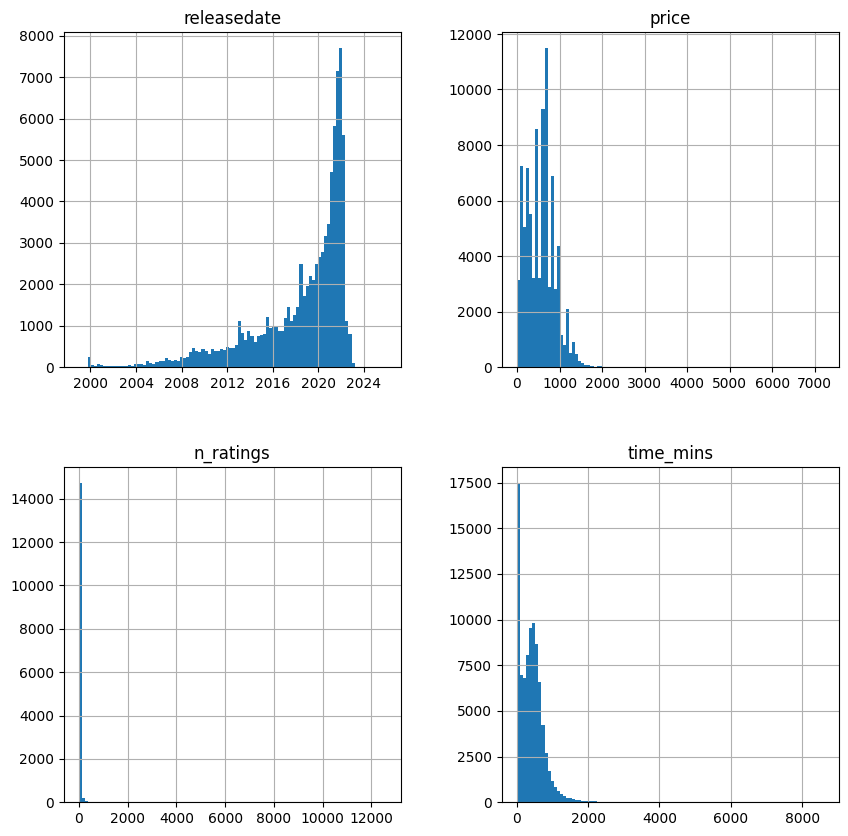

In [70]:
df.hist(figsize = (10, 10), bins = 100)

In [71]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
releasedate,87489,2018-06-22 01:35:29.780886528,1998-12-27 00:00:00,2016-08-30 00:00:00,2020-01-30 00:00:00,2021-08-04 00:00:00,2025-11-14 00:00:00,NaN
price,87489.0,559.009246,0.0,268.0,585.0,755.0,7198.0,336.096642
n_ratings,15072.0,21.61319,1.0,1.0,2.0,7.0,12573.0,207.479634
time_mins,87489.0,417.497663,1.0,142.0,386.0,584.0,8595.0,364.559399


In [72]:
df.describe(exclude = [np.number]).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
name,87489,82767,The Art of War,20,NaT,NaT,NaT,NaT,NaT,NaT
author,87489,48374,"矢島雅弘,石橋遊",874,NaT,NaT,NaT,NaT,NaT,NaT
narrator,87489,29717,anonymous,1034,NaT,NaT,NaT,NaT,NaT,NaT
releasedate,87489,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,1998-12-27,2016-08-30,2020-01-30,2021-08-04,2025-11-14
language,87489,36,English,61884,NaT,NaT,NaT,NaT,NaT,NaT
rating_stars,15072.0,9.0,5.0,6761.0,NaT,NaT,NaT,NaT,NaT,NaT


In [73]:
#Bu alıştırma için fiyatları USD'ye çevireceğiz. 1 USD = 0,012 INR döviz kurunu kullanabiliriz

In [74]:
df["price"] = df["price"] * 0.012

In [75]:
df["price"].describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

In [76]:
df["language"].unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [77]:
#Dil sütunundaki değerler farklı büyük harf kullanımına sahiptir. Bunu düzeltelim.

In [78]:
df["language"] = df["language"].str.capitalize()

In [79]:
df["language"].unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

In [80]:
#Görev 7: Kopyaları kontrol etme

In [81]:
#Kaç kopyamız var?

In [82]:
df.duplicated().sum()

0

In [83]:
#Yalnızca mantıklı olan sütunların bir alt kümesini kullanarak kopyaları aramak yararlıdır. Aşağıdaki sütun alt kümesini kullanacağız:

In [84]:
#name, author, narrator, time_mins, price

In [85]:
subset_cols = ["name", "author", "narrator", "time_mins", "price"]

In [86]:
df.duplicated(subset = subset_cols).sum()

70

In [87]:
#Şimdi bu değerlere bakalım (keep=false kullanın) ve neler olup bittiğini görelim:

In [88]:
df[df.duplicated(subset = subset_cols, keep = False)].sort_values(by = "name")

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,0.900,5.0,1823.0,75


In [89]:
#Kopyaların farklı sürüm tarihlerine sahip dosyalar için olduğunu görebiliriz. Son çıkış tarihi ile kaydı tutmaya karar verebiliriz.

In [90]:
df.drop_duplicates(subset = subset_cols, keep = "last", inplace = True)

In [91]:
df.duplicated(subset = subset_cols).sum()

0

In [92]:
#Görev 8: Eksik verilerle ilgilenme

In [93]:
#Bitirmeden önce sütunlarımızdaki eksik verilere bir göz atalım

In [94]:
df.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

In [95]:
#NaN değerlerini 0 veya başka bir sayısal değere çevirebilir veya tutabiliriz. Kullanım durumumuza bağlıdır.

In [96]:
#Derecelendirme dağılımını çizmek istiyorsak, derecelendirmesi olmayan sesli kitapları bırakmak mantıklı olabilir. Ancak analizimiz için fiyat dağılımını kullanmamız gerekirse, derecelendirmesiz sesli kitapların kaldırılması sonuçlarımıza yanlılık katacaktır (çünkü derecelendirilmemiş sesli kitaplar muhtemelen daha niştir ve derecelendirilmiş sesli kitaplardan farklı bir fiyatlandırma yapısına sahip olabilir).

In [97]:
#Derecelendirilmemiş sesli kitapları şimdilik elimizde tutacağız.

In [98]:
#Görev 9: Temizlenen veri setini kaydedin

In [99]:
#Temiz dosyayı kaydetmek için .to_csv yöntemini kullanabiliriz. Geçerli dizini hedef dosyamıza da kopyalamamak için index=False öğesini ekleriz.

In [100]:
df.to_csv("D:\DataAnalysis\CleaningDatainPython\\audible_cleaned.csv", index = False)